In [0]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("dataset.csv") 

In [5]:
df.head()

,hmid,moment,concepts,agency,social,age,country,gender,married,parenthood,reflection,duration
0,27674,I was happy when my son got 90% marks in his e...,education|family,no,yes,29.0,IND,m,married,y,24h,half_a_day
1,27685,went to movies with my friends it was fun,entertainment,yes,yes,29.0,IND,m,single,y,24h,half_a_day
2,27691,A hot kiss with my girl friend last night made...,romance,yes,yes,25.0,IND,m,married,y,24h,at_least_one_hour
3,27701,My son woke me up to a fantastic breakfast of ...,family|food,no,yes,79,USA,f,widowed,y,24h,all_day_im_still_feeling_it
4,27712,My older daughter keeps patting my younger dau...,family,no,yes,30,USA,f,married,y,24h,a_few_moment


In [6]:
df.columns

Index(['hmid', 'moment', 'concepts', 'agency', 'social', 'age', 'country',
       'gender', 'married', 'parenthood', 'reflection', 'duration'],
      dtype='object')

In [7]:
df.shape

(10560, 12)

### **Data Analysis**


In [0]:
#Removing id 
t_df = df.drop(df.columns[[0,1,2,6,11]], axis=1)       #Removing hmid,happymoment,concepts,country,duration

In [10]:
t_df.head()

,agency,social,age,gender,married,parenthood,reflection
0,no,yes,29.0,m,married,y,24h
1,yes,yes,29.0,m,single,y,24h
2,yes,yes,25.0,m,married,y,24h
3,no,yes,79,f,widowed,y,24h
4,no,yes,30,f,married,y,24h


In [11]:
t_df.shape

(10560, 7)

In [12]:
#Encoding categorical labels
label_encoder = preprocessing.LabelEncoder()
cols = [0,1,3,4,5,6]          #not for age
for i in cols:
    print(t_df.columns[i])
    label_encoder.fit(t_df.iloc[:,i].astype('str'))
    print(list(label_encoder.classes_))
    t_df.iloc[:,i] = label_encoder.transform(t_df.iloc[:,i].astype('str')).astype('float64')
    

agency
['no', 'yes']
social
['no', 'yes']
gender
['f', 'm', 'nan', 'o']
married
['divorced', 'married', 'nan', 'separated', 'single', 'widowed']
parenthood
['n', 'nan', 'y']
reflection
['24h', '3m']


In [0]:
df_agency = t_df[['agency','age','gender','married','parenthood','reflection']]
df_social = t_df[['social','age','gender','married','parenthood','reflection']]

# Correlation among Features

### Agency

In [15]:
corr1 = df_agency.corr()
corr1

,agency,gender,married,parenthood,reflection
agency,1.000000,0.068466,0.100804,-0.126032,-0.022771
gender,0.068466,1.000000,0.132348,-0.139602,0.003909
married,0.100804,0.132348,1.000000,-0.629622,0.008826
parenthood,-0.126032,-0.139602,-0.629622,1.000000,-0.006921
reflection,-0.022771,0.003909,0.008826,-0.006921,1.000000


Text(0.5, 1.05, 'Correlation of features for Agency')

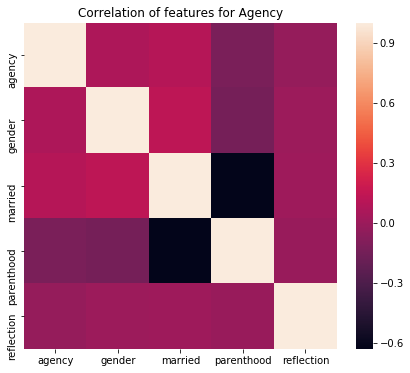

In [16]:
f,ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr1)
plt.title("Correlation of features for Agency",y=1.05)

Social

In [17]:
corr2 = df_social.corr()
corr2

,social,gender,married,parenthood,reflection
social,1.000000,-0.079635,-0.125731,0.165523,0.040565
gender,-0.079635,1.000000,0.132348,-0.139602,0.003909
married,-0.125731,0.132348,1.000000,-0.629622,0.008826
parenthood,0.165523,-0.139602,-0.629622,1.000000,-0.006921
reflection,0.040565,0.003909,0.008826,-0.006921,1.000000


Text(0.5, 1.05, 'Correlation of features for Social')

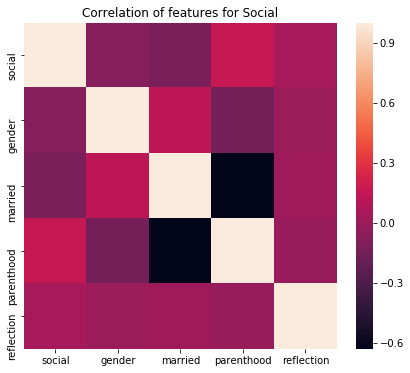

In [18]:
f,ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr2)
plt.title("Correlation of features for Social",y=1.05)

## Length of moments

In [0]:
moments_a = df[['moment','agency']]
moments_s = df[['moment','social']]

In [0]:
def len_moment(moment):
    moment = moment.strip()
    moment = moment.split()
    return len(moment)

Agency

In [21]:
yes_length = 0
yes_count = 0
no_length = 0
no_count = 0

for i in range(len(moments_a)):
    moment = moments_a.iloc[i][0]
    agency = moments_a.iloc[i][1]
    if( agency == "yes"):
        yes_count += 1
        yes_length += len_moment(moment)
    else:
        no_count += 1
        no_length += len_moment(moment)
    
    
print("Avg length of moment for Agency-YES : ",(float(yes_length)/float(yes_count)))
print("Avg length of moment for Agency-NO : ",(float(no_length)/float(no_count)))

Avg length of moment for Agency-YES :  13.053873781426372
Avg length of moment for Agency-NO :  14.535817655571636


Social

In [22]:
yes_length = 0
yes_count = 0
no_length = 0
no_count = 0

for i in range(len(moments_s)):
    moment = moments_s.iloc[i][0]
    social = moments_s.iloc[i][1]
    if( social == "yes"):
        yes_count += 1
        yes_length += len_moment(moment)
    else:
        no_count += 1
        no_length += len_moment(moment)
    
    
print("Avg length of moment for Social-YES : ",(float(yes_length)/float(yes_count)))
print("Avg length of moment for Social-NO : ",(float(no_length)/float(no_count)))

Avg length of moment for Social-YES :  14.674666666666667
Avg length of moment for Social-NO :  12.036474164133738
